In [1]:
import csv

import pandas as pd

import numpy as np

import torch

from torch import nn, optim

from torch.autograd import Variable

from torch.utils.data import Dataset

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import time

In [2]:
# 定义自己的类
class MyDataset(Dataset):
    
    # 初始化
    def __init__(self, file_name):
        # 读入数据
        self.data = pd.read_csv(file_name)
    
    # 返回df的长度
    def __len__(self):
        return len(self.data)
    
    # 获取第idx+1列的数据
    def __getitem__(self, idx):
        return self.data.values[idx,1:10]

# 通过实例化对象来访问该类
# 假设同目录下存在名为median_benchmark.csv的文件
ds = MyDataset('formatweather.csv')
ds=np.asarray(ds[:], dtype = np.float32)#####源文件float32 ,不知道为什么读取变为float64，这里再进行处理  最大最小化时变化
##dl = DataLoader(ds, batch_size=100, shuffle=False)

#####处理为torch，分为trainx，trainy
torchds=torch.from_numpy(ds[:])


In [3]:
train_dataset =torchds[:30700]  ##0.7*43823
test_dataset =torchds[30700:]
dl = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [4]:
class Cnn(nn.Module):

    def __init__(self, in_dim, n_class):

        super(Cnn, self).__init__()

        self.conv = nn.Sequential(

            nn.Conv2d(in_dim, 6, (1,2), stride=(1), padding=(0,1)),#6,1,9

            nn.ReLU(True),

            nn.MaxPool2d(1, 1),#6,1,9

            nn.Conv2d(6, 16, (1,3), stride=(1), padding=(0,1)),

            nn.ReLU(True), nn.MaxPool2d(1, 1))#16,1,9
   
            #5*144

        self.fc = nn.Linear(144, 16)
        
        self.fc1 = nn.Linear(16, 3)
        
        self.fc2 = nn.Linear(3, n_class)


    def forward(self, x):

        out = self.conv(x)

        out = out.view(out.size(0), -1)

        out = self.fc(out)
        
        out1=self.fc1(out)
        
        out=self.fc2(out1)
        
        #out = out.view(5)

        return out

In [5]:
model = Cnn(1, 1)
##model.load_state_dict(torch.load('./weathercnn.pth'))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
losslist,evallosslist,accuracylist=[],[],[]

start = time.clock()
for epoch in range():
 
    print('epoch {}'.format(epoch + 1))

    print('*' * 10)

    running_loss = 0.0

    for i, data in enumerate(dl, 1):
        
            train_x=data[:,0:8]
            
            train_x=train_x.view(-1,1,1,8)
            
            train_y=data[:,8]
            
            train_y=train_y.view(-1,1)
            
            train_x=Variable(train_x)
            
            train_y=Variable(train_y)
        
            out = model(train_x)

            loss = criterion(out, train_y)
            
            running_loss += loss.item() * train_y.size(0)

            # 向后传播

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
    ###losslist
            
    losslist.append(running_loss / (len(train_dataset)))   
    
    ######进入评估模式
    model.eval()
    
    test_x=test_dataset[:,0:8]

    test_x=test_x.view(-1,1,1,8)

    test_y=test_dataset[:,8]

    test_y=test_y.view(-1,1)

    test_x=Variable(test_x)

    test_y=Variable(test_y)

    evalout = model(test_x)

    evalloss = criterion(evalout, test_y)
    
    evalrunning_loss = evalloss.item()## * test_y.size(0)
    
    ###evallist
    
    evallosslist.append(evalrunning_loss)
    
    ####计算准确率
    acc=0
    for i in range(13123):
        x=test_y.numpy()[i]-evalout.detach().numpy()[i]
        if abs(x)<=0.02:
            acc+=1
    accuracy_rate=acc/13123
    #print(accuracy_rate)
    ##accuracylist
    accuracylist.append(accuracy_rate)
                
    #print('running_loss:-------')
    #print(running_loss / (len(train_dataset)))  ##0.0006970368708326127 ##  
    print('{0} {1} {2}'.format(running_loss / (len(train_dataset)),evalrunning_loss,accuracy_rate))
    ##0.0007041956713564955 0.0005104942829348147 0.8295359292844624
    #print(out,train_y)
print(time.clock()-start)  ##283.5160363  2-625.7817151 572.3782882     ##334.8

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


epoch 1
**********
0.0007045548354239122 0.0005091586499474943 0.8305265564276462
epoch 2
**********
0.0007040856195350575 0.0005069542676210403 0.8309837689552694
epoch 3
**********
0.000703423507297366 0.0005084199365228415 0.8311361731311437
epoch 4
**********
0.0007032535676613105 0.0005087408353574574 0.8296883334603368
epoch 5
**********
0.0007034251035050055 0.0005076772649772465 0.8315933856587671
epoch 6
**********
0.000702841814678672 0.000505827774759382 0.831212375219081
epoch 7
**********
0.0007027718537628912 0.0005073698121123016 0.8306027585155833
epoch 8
**********
0.0007025223974849883 0.0005054749781265855 0.831212375219081
epoch 9
**********
0.0007024443532884006 0.0005052363849245012 0.8314409814828926
epoch 10
**********
0.0007022750201875477 0.0005057179369032383 0.8321268002743275
epoch 11
**********
0.0007019026034965912 0.000504721945617348 0.8316695877467043
epoch 12
**********
0.0007021147942156091 0.0005045889411121607 0.8316695877467043
epoch 13
**********

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


97.24509800000033


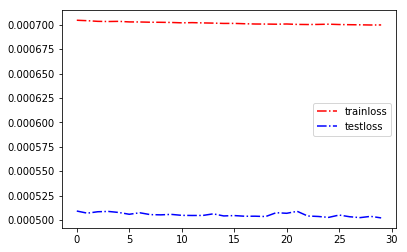

In [17]:
plt.plot(losslist,'r-.',label='trainloss') 
plt.plot(evallosslist,'b-.',label='testloss') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

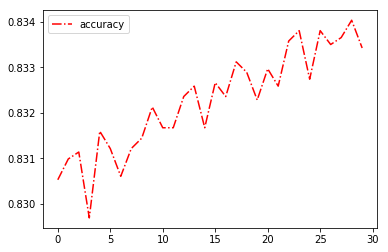

In [18]:
plt.plot(accuracylist,'r-.',label='accuracy') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

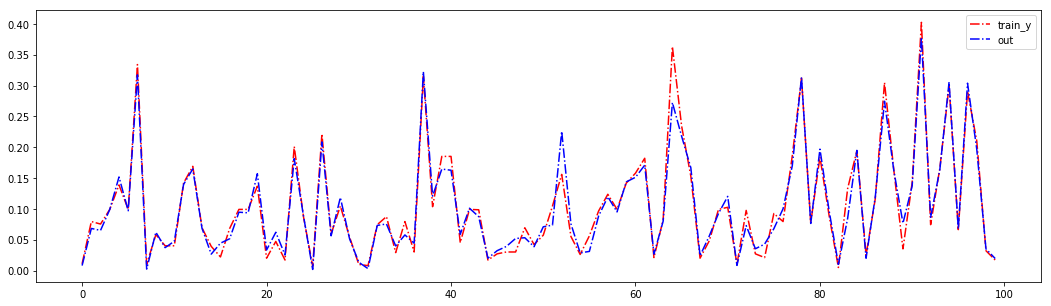

In [19]:
x=range(0,100)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,train_y.numpy(),'r-.',label='train_y') 
plt.plot(x,out.detach().numpy(),'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

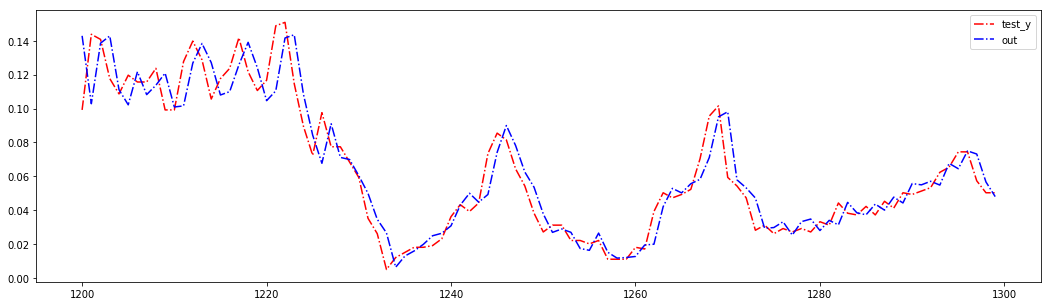

In [20]:
#x=range(0,13123)
x=range(1200,1300)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,test_y.numpy()[1200:1300],'r-.',label='test_y') 
plt.plot(x,evalout.detach().numpy()[1200:1300],'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

In [15]:
# 保存模型
torch.save(model.state_dict(), './weathercnn-0.01-true-7.18.pth')